Saving fashion-mnist_test.csv.zip to fashion-mnist_test.csv (2).zip


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5020 - loss: 1.5121 - val_accuracy: 0.7812 - val_loss: 0.6193
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7836 - loss: 0.6145 - val_accuracy: 0.8425 - val_loss: 0.4851
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8327 - loss: 0.4955 - val_accuracy: 0.8687 - val_loss: 0.4340
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8458 - loss: 0.4648 - val_accuracy: 0.8587 - val_loss: 0.4048
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8485 - loss: 0.4350 - val_accuracy: 0.8338 - val_loss: 0.4620
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8506 - loss: 0.4188 - val_accuracy: 0.8737 - val_loss: 0.3655
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8641 - loss: 0.3784 - val_accuracy: 0.8737 - val_loss: 0.3635
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8675 - loss: 0.3683 - val_accuracy: 0.8775 - val_l

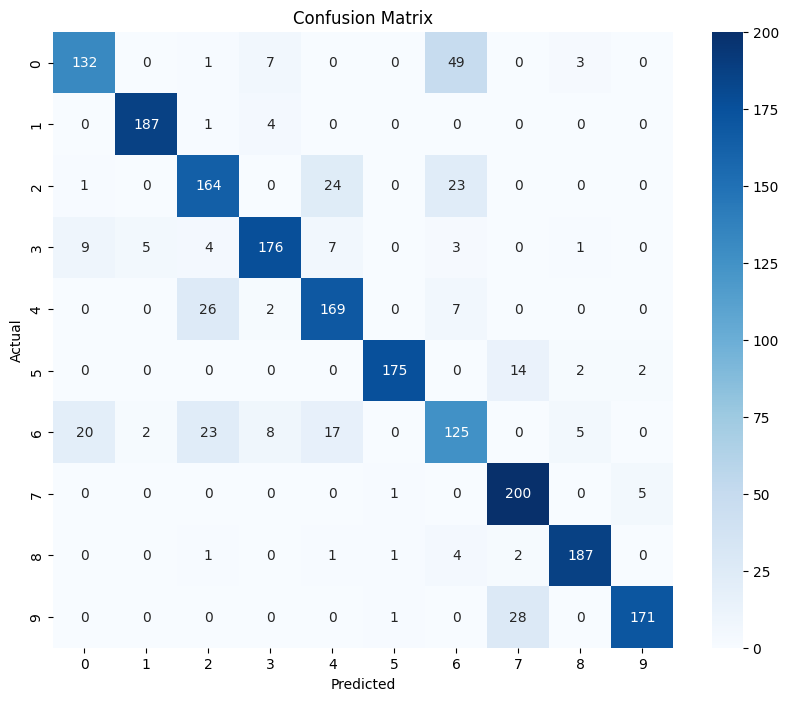

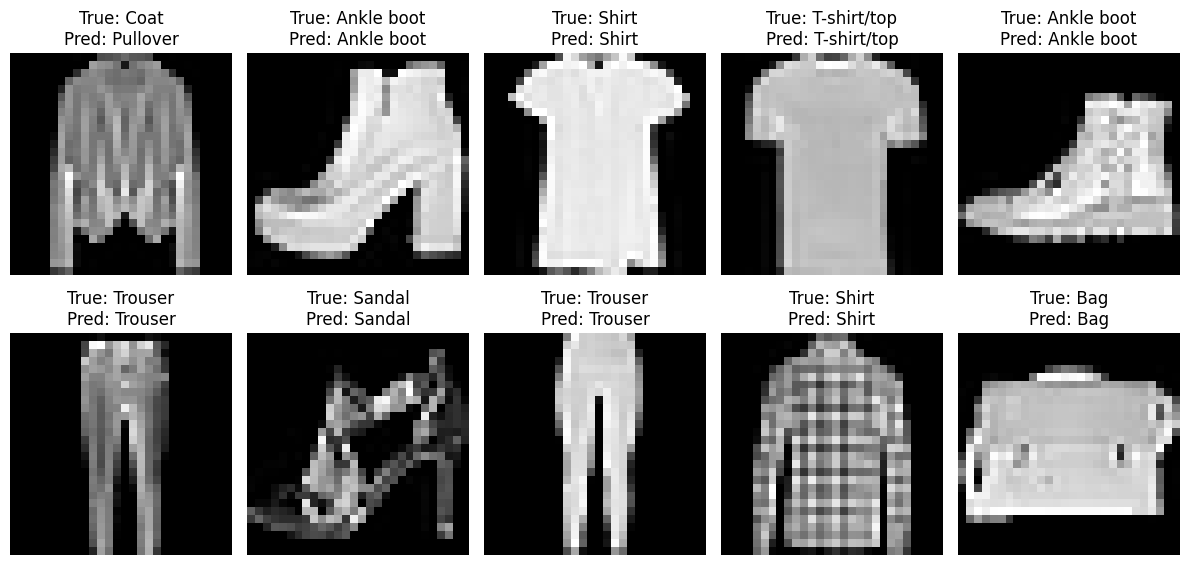

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.69      0.75       192
     Trouser       0.96      0.97      0.97       192
    Pullover       0.75      0.77      0.76       212
       Dress       0.89      0.86      0.88       205
        Coat       0.78      0.83      0.80       204
      Sandal       0.98      0.91      0.94       193
       Shirt       0.59      0.62      0.61       200
     Sneaker       0.82      0.97      0.89       206
         Bag       0.94      0.95      0.95       196
  Ankle boot       0.96      0.85      0.90       200

    accuracy                           0.84      2000
   macro avg       0.85      0.84      0.84      2000
weighted avg       0.85      0.84      0.84      2000



In [5]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from google.colab import files
import os

# Step 1: Upload the ZIP file
uploaded = files.upload()
zip_filename = list(uploaded.keys())[0]

# Step 2: Unzip the file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("unzipped_data")

# Step 3: Read the extracted CSV file
csv_files = os.listdir("unzipped_data")
csv_path = os.path.join("unzipped_data", csv_files[0])
data = pd.read_csv(csv_path)

# Step 4: Prepare data
X = data.iloc[:, 1:].values / 255.0
y = data.iloc[:, 0].values
y_cat = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)
X_test_images = X_test.reshape(-1, 28, 28)

# Step 5: Build and train model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# Step 6: Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Step 7: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 8: Visualize 10 predictions
label_map = {
    0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
    5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"
}
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test_images[i], cmap='gray')
    plt.title(f"True: {label_map[y_true[i]]}\nPred: {label_map[y_pred[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Step 9: Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=list(label_map.values())))
